In [14]:
#libraries
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2

### 4. Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?

Loading the personal image from the cohort folder in the point 2. I´m going to use the next libraries:
- matplotlib: to read and plot images
- np.linalg.sv: to calculate de svd descomposition and get the sigular values

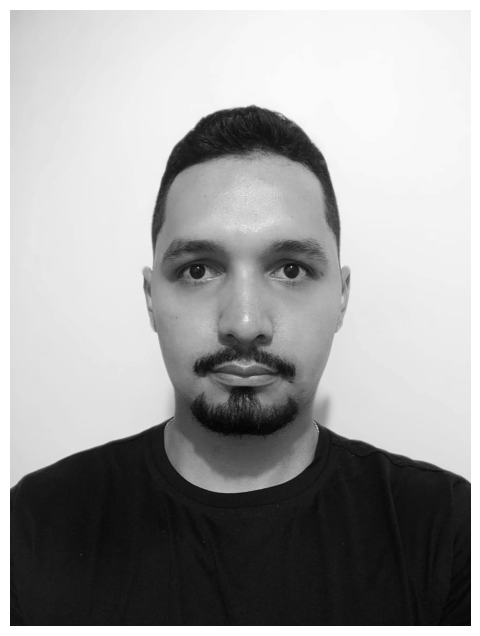

In [15]:
# Reading the image and setting the size and color
plt.rcParams['figure.figsize'] = [16, 8]

A = imread(r"../point_2/profile_pictures/walter.jpeg")
X = np.mean(A, -1)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Computing svd descomposition and getting the sigma values. 

In [16]:
from uns_package.SVD import SVD
svd = SVD()
svd.fit(M=X)
u, sigma, vt = svd.transform()

1156 865


In [17]:
u, sigma, vt = np.linalg.svd(X, full_matrices= False)
# Building diagonal matrix with singular values
sigma = np.diag(sigma)

To reconstruct the image we need to multiply the resulting matrices from svd descomposition iterating the number of singular values 

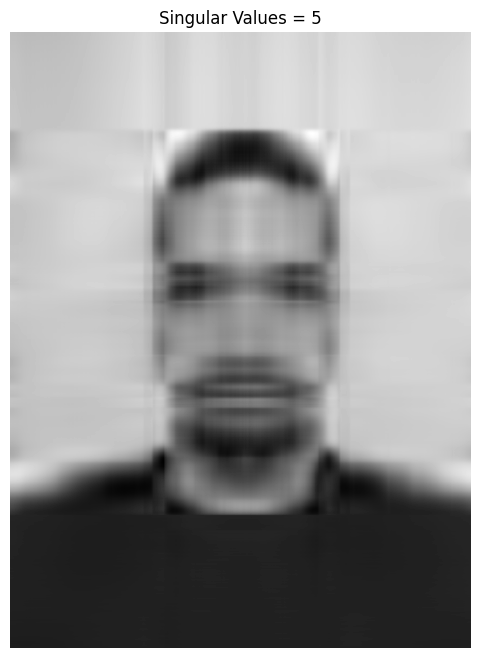

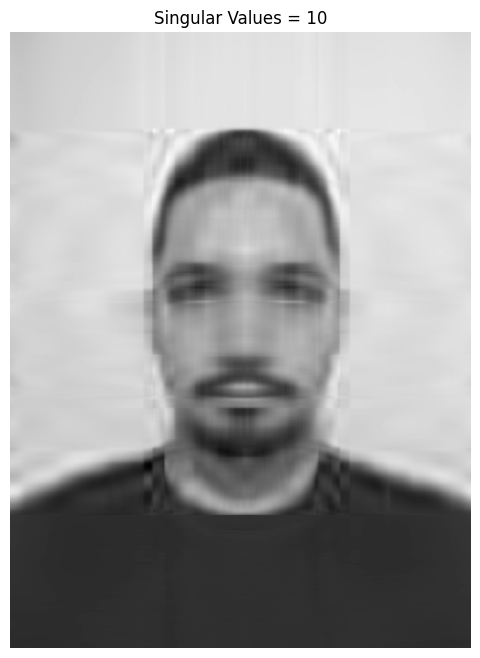

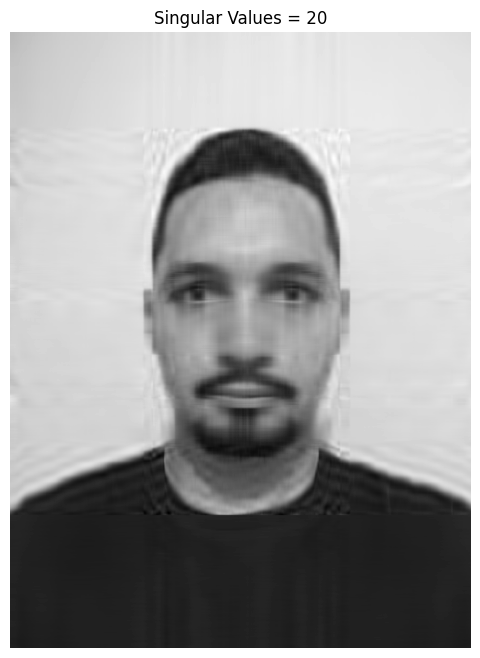

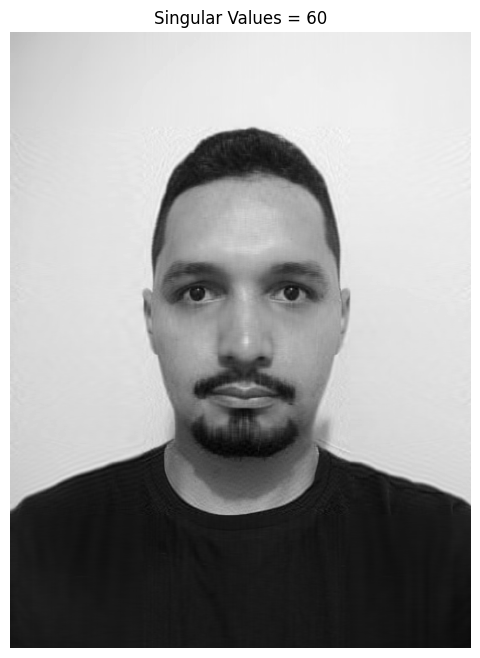

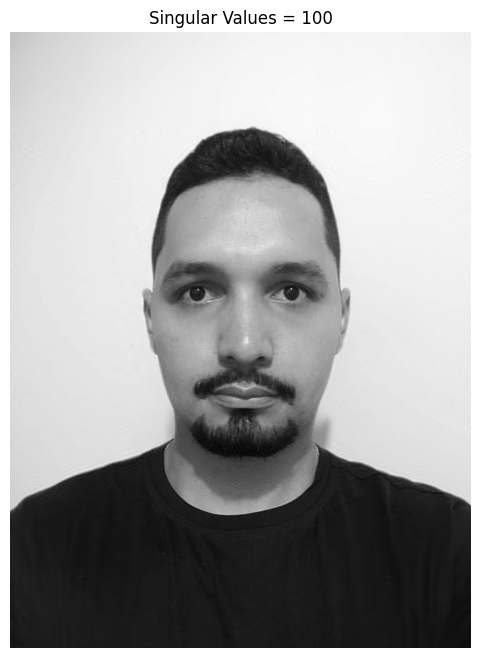

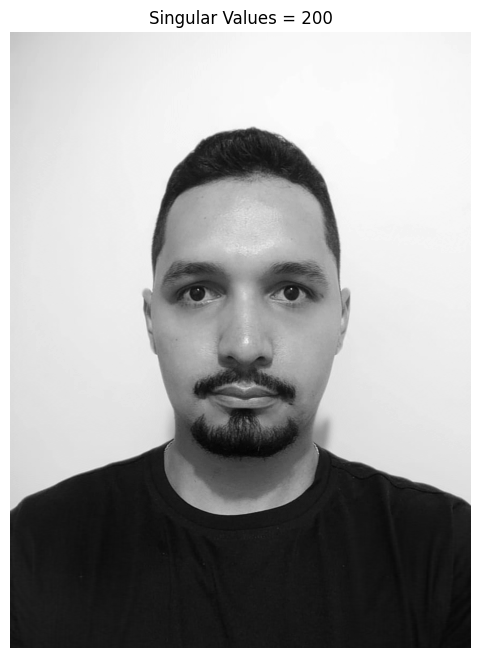

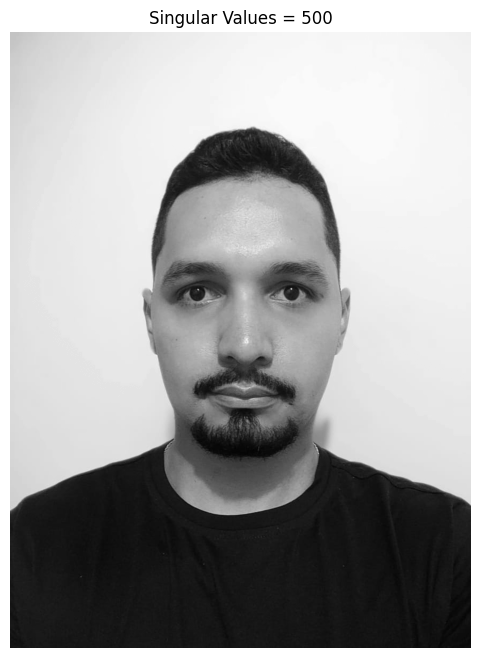

In [18]:
i = 0
singular_values = [5,10,20,60,100,200,500]
images = []
for singular_value in singular_values:
    x_ap = u[:,:singular_value] @ sigma[0:singular_value,:singular_value] @ vt[:singular_value,:]
    images.append(x_ap)
    plt.figure(i+1)
    i += 1
    img = plt.imshow(x_ap)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('Singular Values = ' + str(singular_value))
    plt.show()

As we can see in the reconstructed images for 60 singular values we can identify perfectrly the image, but with a low quality, we can get this starting at 100 or higher

To quantify the different betwenn the original photo and the reconstructed images, i used mse between the pixels:

"To compare two images, we use the Mean Square Error (MSE) of the pixel values of the two images. Similar images will have less mean square error value. Using this method, we can compare two images having the same height, width and number of channels."
Reference: https://www.tutorialspoint.com/how-to-compare-two-images-in-opencv-python#:~:text=To%20compare%20two%20images%2C%20we,width%20and%20number%20of%20channels.

In [19]:
# Using openCV library to define the mse function
def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse

Calculating mse between original picture and the reconstructed

In [20]:
i = 0
for i in range(0, len(images)):
    mse_images = mse(X, images[i])
    print("mse image vs sing values {} : {}".format(singular_values[i], mse_images))

mse image vs sing values 5 : 258.075732031472
mse image vs sing values 10 : 112.29627773196879
mse image vs sing values 20 : 45.875945583182386
mse image vs sing values 60 : 9.32277886914919
mse image vs sing values 100 : 3.7178271733554635
mse image vs sing values 200 : 0.6020180193722273
mse image vs sing values 500 : 0.0047298873309375945


The mse has a representative low image in 100 singular values or higher. This methos helpus to quantify the best low representarion of our face